# A brief introduction to using Python in Astronomy

The purpose of this lesson is to introduce a few tools that can be very useful for working with Python. The benefits of using these tools might not be apparent immediately and you might choose not to use them in the ongoing courses. This is because their utility is correlated very strongly with the age of your code, the size of your code and the number of people you are collaborating with. So in a course project that you work on individually over a short time period of a couple of weeks and which does not involve much code you could get away with ignoring everything introduced in this notebook. But you will work on your Master's project over several months, most likely write quite a lot of code and at the very least you will be working together with your supervisor, so it is highly recommended that you incorporate the tools discussed below (or their analogues if you will be coding in some other language) into your workflow by that time.

## NOTE:
Some of the packages and tools we use in this manual must be installed before you can run them. 

## Virtual environments

It is often a good idea to run Python in a virtual environment, whether it is set up through [venv](https://docs.python.org/3/tutorial/venv.html) or Anaconda. Among many other benefits this allows you to test your code in a clean environment to ensure that you have not forgotten to list any dependencies (which is important if anyone else ever tries to run your code), but also to install Python packages without requiring root access to your computer. At the moment you are likely already running Python in a virtual environment created by Anaconda.

## PEP 8

[The Python Style Guide](https://www.python.org/dev/peps/pep-0008/), commonly referred to as PEP 8, was already mentioned in the first lesson. Here we introduce tools that allow you to check if your code is PEP 8 compliant. One such tool is [pycodestyle](https://pypi.org/project/pycodestyle/). If you wish to check a Python script called 'helloworld.py' you would simply run
```
$ pycodestyle helloworld.py
```
With [pycodestyle_magic](https://github.com/mattijn/pycodestyle_magic) it is possible to check if your code cells in a Jupyter notebook are PEP 8 compliant or not. Its use is demonstrated below.

In [1]:
%load_ext pycodestyle_magic
# Using lines longer than 80 characters within a notebook could be reasonable
%flake8_on --max_line_length 99

In [2]:
a='This code is not PEP 8 compliant! Not only will pycodestyle get very upset, it will make sure you will be upset too.' 
for sentence in a.split( '! ' ):
  print(sentence ,end ='\n\n')# Notice how the Python interpreter does not require 4 space indents

1:2: E225 missing whitespace around operator
1:100: E501 line too long (120 > 99 characters)
1:121: W291 trailing whitespace
2:25: E201 whitespace after '('
2:30: E202 whitespace before ')'
3:3: E111 indentation is not a multiple of four
3:17: E203 whitespace before ','
3:18: E231 missing whitespace after ','
3:22: E251 unexpected spaces around keyword / parameter equals
3:31: E261 at least two spaces before inline comment


This code is not PEP 8 compliant

Not only will pycodestyle get very upset, it will make sure you will be upset too.



Although the example above has produced more complaints than there are lines in the code, all the error messages state exactly where the PEP 8 violations are located and what the problems are. This makes fixing them quite straightforward.

## Docstrings

Docstrings are an important documentation tool in Python. In fact they are important enough that the conventions for writing docstrings are not provided in PEP 8, but separately in [PEP 257](https://www.python.org/dev/peps/pep-0257/). You can think of docstrings as special comments that, differently from normal comments, are accessible from the Python interpreter. They are often used by IDEs but also for automatically generating online documentation. Very basic use of docstrings is demonstrated below.

In [3]:
def hello_world():
    """Prints 'Hello, World!'"""
    print('Hello, World!')


help(hello_world)

Help on function hello_world in module __main__:

hello_world()
    Prints 'Hello, World!'



If you are writing something that might be used by many people and wish to adhere to good docstring conventions then it might be a good idea to check out the [NumPy docstring convention](https://numpydoc.readthedocs.io/en/latest/format.html) and the [pydocstyle](https://github.com/PyCQA/pydocstyle/) tool. A NumPy docstring is provided as an example.

In [4]:
from numpy import unique
help(unique)

Help on function unique in module numpy:

unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements:
    
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array
    
    Parameters
    ----------
    ar : array_like
        Input array. Unless `axis` is specified, this will be flattened if it
        is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` (along the specified axis,
        if provided, or in the flattened array) that result in the unique array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array (for the specified
        axis, if pro

Inside a Jupyter notebook you can use the IPython commands `?` and `?? ` to view the docstring and source of a function respectively. Because these are IPython commands rather than normal Python commands, pycodestyle will think they are a syntax error, but this is not a problem in Jupyter.

In [5]:
unique?

7: E999 SyntaxError: invalid syntax


In [6]:
unique??

7: E999 SyntaxError: invalid syntax


## Testing

It is a good idea to write tests that check whether or not your code produces the expected output. This can help you make sure that all the dependencies of your code are properly installed and working, code changes have not resulted in unexpected consequences or that the recent addition you have made is working as it should. A good framework for performing such tests is [pytest](https://docs.pytest.org/en/latest/). Inside a Jupyter notebook we should use [ipytest](https://pypi.org/project/ipytest/), which is based on pytest. 

In [7]:
import ipytest
ipytest.autoconfig()

In [13]:
# A faulty function
def int_square(a):
    return a

In [14]:
%%run_pytest[clean] -qq

# The test that reveals the problems
def test_square():
    assert isinstance(int_square(0.), int)
    assert int_square(3) == 9

F                                                                                                                [100%]
======================================================= FAILURES =======================================================
_____________________________________________________ test_square ______________________________________________________

    def test_square():
>       assert isinstance(int_square(0.), int)
E       assert False
E        +  where False = isinstance(0.0, int)
E        +    where 0.0 = int_square(0.0)

<ipython-input-14-c6bf4b631d49>:3: AssertionError
=============================================== short test summary info ================================================
FAILED tmp93regl57.py::test_square - assert False


Although pytest tries to help us as much as possible in figuring out what is causing the tests to fail, you should keep in mind that pytest runs the tests it is told to run. How useful pytest is for figuring out problems depends on how well these tests are written.

## Version control

It is a good idea to have some version control software manage your code. Not only would this allow you to restore older versions of your code repository, it can also help you to document how the code has evolved. If you are using [Git](https://git-scm.com) it is very simple to host your code (either privately or publicly) on [GitHub](https://github.com), [GitLab](https://gitlab.com) or [Bitbucket](https://bitbucket.org/) (this list is far from being complete). This functions both as a backup in the cloud but also allows you to easily share your code with your collaborators (or at the very least your supervisor), though Git can certainly be useful even if you never share your repository with anyone.

If you are interested in version control then you can read more about it from [Chapter 1 Section 1 of the Pro Git book](https://git-scm.com/book/en/v2/Getting-Started-About-Version-Control). If you are interested in using Git then you can continue on reading the book. If you are interested in using some other version control software, then you should first have a look [here](https://git-scm.com/about) and then repent by reading the [Pro Git book](https://git-scm.com/book/en/v2).

## Performance optimization & profiling

Sometimes when you write code you will find that the efficiency of your code matters. You have a simple task that takes far too long to run and you need to figure out a way of improving the performance. Doing this is a matter of optimizing your code and the Python wiki has compiled a useful [list of general tips and tricks](https://wiki.python.org/moin/PythonSpeed/PerformanceTips) that can make your code smoother.

Knowing what makes a code perform faster beforehand is of course useful but not always realistic. Here we will focus on identifying what is making your code slow after you are already finished with it. We call this **profiling**.

In previous lectures we already discussed the use of [timeit](https://docs.python.org/3/library/timeit.html) and its magic functions. Instead we will now discuss means with which to profile an entire script on a line-by-line basis.  


### Jupyter profiling

First, we will do this in Jupyter using [line_profiler](https://github.com/pyutils/line_profiler) and [pyheat](https://github.com/csurfer/pyheatmagic).

In [15]:
%load_ext heat
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt

The heat extension is already loaded. To reload it, use:
  %reload_ext heat
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Say we had the following function for calculating a [moving average](https://en.wikipedia.org/wiki/Moving_average)

In [38]:
def movmean(xdata, ydata, window):
    ydata_new = np.zeros(len(ydata))
    xdata_new = np.zeros(len(xdata))
    k = int(window/2)
    for i in range(len(ydata)):
        if i < window:
            ydata_new[i] = np.mean(ydata[:(i+k)])
            xdata_new[i] = np.mean(xdata[:(i+k)])
        elif i > len(ydata)-window:
            ydata_new[i] = np.mean(ydata[(i-k):])
            xdata_new[i] = np.mean(xdata[(i-k):])
        else:
            ydata_new[i] = np.mean(ydata[(i-k):(i+k)])
            xdata_new[i] = np.mean(xdata[(i-k):(i+k)])
    return(xdata_new, ydata_new)

We use it on some noisy data that we have.

Text(0, 0.5, '$y$')

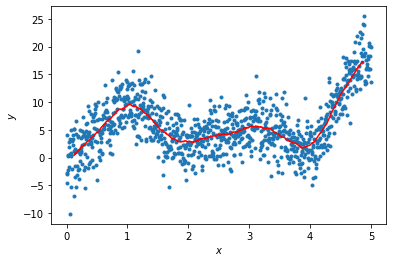

In [19]:
x, y = np.loadtxt('xy.txt')
x_med, y_med = movmean(x, y, 100)

plt.plot(x, y, '.')
plt.plot(x_med, y_med, 'r')
plt.xlabel('$x$')
plt.ylabel('$y$')

Now we run `line_profiler` on the function call to identify what our bottlenecks are using `%lprun`.

In [40]:
%lprun -f movmean movmean(x, y, 100)

This brings up the results to the pager which tells us that most of our time is spent in the else statement where it should be.  

We might want to use `heat` instead. In this case, we need to have the function defined in the same cell. For this reason, it is more applicable to be used on entire scripts or self-contained cells that do not rely on previous cells in Jupyter.

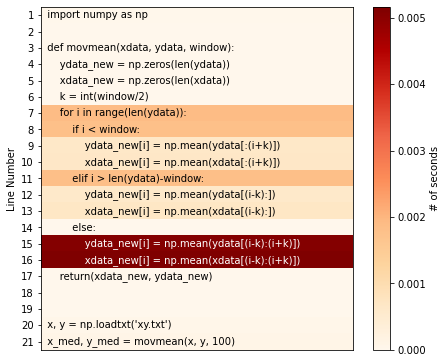

In [39]:
%%heat
import numpy as np

def movmean(xdata, ydata, window):
    ydata_new = np.zeros(len(ydata))
    xdata_new = np.zeros(len(xdata))
    k = int(window/2)
    for i in range(len(ydata)):
        if i < window:
            ydata_new[i] = np.mean(ydata[:(i+k)])
            xdata_new[i] = np.mean(xdata[:(i+k)])
        elif i > len(ydata)-window:
            ydata_new[i] = np.mean(ydata[(i-k):])
            xdata_new[i] = np.mean(xdata[(i-k):])
        else:
            ydata_new[i] = np.mean(ydata[(i-k):(i+k)])
            xdata_new[i] = np.mean(xdata[(i-k):(i+k)])
    return(xdata_new, ydata_new)


x, y = np.loadtxt('xy.txt')
x_med, y_med = movmean(x, y, 100)

The output confirms what we know from `line_profiler`.

### Spyder

Spyder has implemented [spyder-line-profiler](https://github.com/spyder-ide/spyder-line-profiler) which is `line_profiler` implemented directly in Spyder.

Once installed you can use it by placing a `@profile` decorator in front of the functions that you want to be profiled. Then either press Shift + F10 or go to `Run > Profile line by line` to start the profiler.

A short demonstration of using this profiler in Spyder can be seen in the video below:

<video controls width="900" src="spyder_line_profiler.mov" />

### Normal Python
When we use profiling in basic Python we can make use of the above `line_profiler` again or the builtin [cProfiler](https://docs.python.org/3/library/profile.html). In a script you could for example do:

In [107]:
import cProfile

cProfile.run('movmean(x, y, 100)')

         28909 function calls in 0.032 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2000    0.001    0.000    0.029    0.000 <__array_function__ internals>:2(mean)
        1    0.003    0.003    0.032    0.032 <ipython-input-38-742527db4f91>:1(movmean)
        1    0.000    0.000    0.032    0.032 <string>:1(<module>)
     2000    0.001    0.000    0.001    0.000 _asarray.py:88(asanyarray)
     2000    0.012    0.000    0.023    0.000 _methods.py:134(_mean)
     2000    0.002    0.000    0.002    0.000 _methods.py:50(_count_reduce_items)
     2000    0.000    0.000    0.000    0.000 fromnumeric.py:3227(_mean_dispatcher)
     2000    0.003    0.000    0.026    0.000 fromnumeric.py:3231(mean)
        1    0.000    0.000    0.032    0.032 {built-in method builtins.exec}
     2000    0.001    0.000    0.001    0.000 {built-in method builtins.hasattr}
     4000    0.001    0.000    0.001    0.000 {built-in method builtin

This output might not be the easiest to interpret. Also `cProfile` only times function calls and so would miss some slow numpy operation like `a[large_index_array] = some_other_large_array`.

Instead we might want to use `line_profiler`. For this we move to the Command line:

Once again, make sure that your function has the `@profile` decorator. Then do the following in the same directory as your .py script:

<pre style="background-color:black;color:white"> 
<code style="background-color:black;color:white"> 
 $ kernprof -l -v spyderexample.py
 
 Wrote profile results to spyderexample.py.lprof
 Timer unit: 1e-06 s
 
 Total time: 0.033536 s
 File: spyderexample.py
 Function: movmean at line 11
 
 Line #      Hits         Time  Per Hit   % Time  Line Contents
 ==============================================================
     11                                           @profile
     12                                           def movmean(xdata, ydata, window):
     13         1         52.0     52.0      0.2      ydata_new = np.zeros(len(ydata))
     14         1          3.0      3.0      0.0      xdata_new = np.zeros(len(xdata))
     15         1          2.0      2.0      0.0      k = int(window/2)
     16      1001        499.0      0.5      1.5      for i in range(len(ydata)):
     17      1000        412.0      0.4      1.2          if i < window:
     18       100       1635.0     16.4      4.9              ydata_new[i] = np.mean(ydata[:(i+k)])
     19       100       1574.0     15.7      4.7              xdata_new[i] = np.mean(xdata[:(i+k)])
     20       900        513.0      0.6      1.5          elif i > len(ydata)-window:
     21        99       1714.0     17.3      5.1              ydata_new[i] = np.mean(ydata[(i-k):])
     22        99       1663.0     16.8      5.0              xdata_new[i] = np.mean(xdata[(i-k):])
     23                                                   else:
     24       801      12539.0     15.7     37.4              ydata_new[i] = np.mean(ydata[(i-k):(i+k)])
     25       801      12930.0     16.1     38.6              xdata_new[i] = np.mean(xdata[(i-k):(i+k)])
     26         1          0.0      0.0      0.0      return(xdata_new, ydata_new)
     
 $ |
 
</code> 
</pre>   

This will generate a file called `<yourscriptname>.py.lpro`. The `-v` option is to let you view the results immediately. Otherwise you can view them by calling

<pre style="background-color:black;color:white"> 
<code style="background-color:black;color:white"> 
 $ python -m line_profiler spyderexample.py.lprof
 
</code> 
</pre> 

## RISE

You will have noticed during the presentations that we used a sort of "slideshow" version of Jupyter notebooks. There are a few ways this can be done and if you want to do this we recommend you use [RISE](https://rise.readthedocs.io/en/stable/#) which is what we have used.  

Once you have installed it, you will find the following button in your notebooks:

![](imgs/RISE1.png)

Which will take you into a presentation mode of your notebook. But before you do that, you need to specify which cells, both markdown and code, belong to a slide. For this, you will want to see slide types under `View > Cell Toolbar > Slideshow`, seen as <strong style="color:red">a</strong> in the following figure:

![](imgs/RISE2.png)

Now you can see the slide type where <strong style="color:red">b</strong> is in the above image. Every cell starting with `Slide` will be a new cell. Try out the other options to quickly figure out what they do.